# Thinking 1 :MVC框架指的是什么?

答：  
MVC架构主要指Web开发中的MVC架构（Model；View；Controller）：模型-视图-控制器。
1.  Model对应Web应用中用于处理数据逻辑的部分，用于和数据库联动，放置业务逻辑代码，处理数据库的增删改查，以及各种Api的存放
2.  View对应Web应用中处理响应给客户页面的部分，例如我们写的html静态页面，jsp动态页面，这些最终响应给浏览器的页面都是视图；通常视图是依据模型数据来创建的
3.  Controller对应Web应用中Serlet部分，用户点选浏览器，浏览器产生需求与Controller交互，Controller将处理完成的数据返回给View，一般代码主要存放在Controller中
![MVC.png](MVC.png)

# Thinking 2 :基于Python的可视化技术都有哪些，你使用过哪些?

答：  
主要可视化技术使用的工具有：seaborn，matplotlib，echarts，Graphviz，networkx，wordcloud等。  
主要包括如下功能：
1.  实现直方图、折线图、饼图、热力图、箱线图、雷达图、二元关系图等基本图。 
2. 决策树可视化图、网络图、词云图、地理可视化图等反应模型结果的图
3. 以及基于web开发的各种交互式可视化图

# Action：购物篮词云分析
>数据集：MarketBasket  
下载地址：https://www.kaggle.com/dragonheir/basket-optimisation  
对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）  

>## 初次分析时发现，wordcloud自带的词频统计并不准确,原因有二：1.未进行连字符处理，2.未进行重复处理：collocations=False,  # 避免重复单词
--->>> 处理后结果一致


# Answer 1 ：
## 基于wordcloud自带词频统计process_text

总计有7501张小票 

根据词频，开始生成词云!


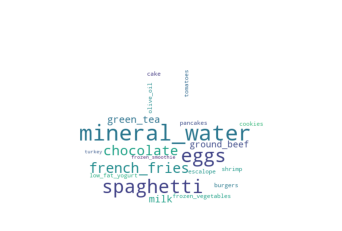

词频前 20 位商品为：
                 Sales  Counts
0       mineral_water    1788
1                eggs    1348
2           spaghetti    1306
3        french_fries    1282
4           chocolate    1230
5           green_tea     991
6                milk     972
7         ground_beef     737
8   frozen_vegetables     715
9            pancakes     713
10            burgers     654
11               cake     608
12            cookies     603
13           escalope     595
14     low_fat_yogurt     574
15             shrimp     536
16           tomatoes     513
17          olive_oil     494
18    frozen_smoothie     475
19             turkey     469


In [1]:
import pandas as pd
import numpy as np
from efficient_apriori import apriori

#加载数据
data = pd.read_csv('c:/Users/10109/Documents/Jupyter notebook/人工智能课程(BI方向)/商业智能和推荐系统/lesson2 挖掘数据中的关联规则/homework/Market_Basket_Optimisation.csv', header = None)
data = data.fillna(0)
#print(data)
#将数据整理成Transaction列表
transaction = []
for i in range(data.shape[0]):
    temp = []
    for j in range(data.shape[1]):
        if data.iloc[i, j] != 0:
            temp.append(data.iloc[i, j])
    transaction.append([temp])
print('总计有{}张小票'.format(data.shape[0]),'\n')

transaction = pd.DataFrame(transaction,columns = [0])

#将数据整理成列表格式
word = []
for i in transaction[0]:
    word += i    
#print(word)

#加载词云等数据包
from wordcloud import WordCloud,ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize


#为避免在拼接时词语被拆分，将空格替换为连字符
def replace_(words):
    new_words = []
    for word in words:
        w = list(word)
        for i in range(len(w)):
            if w[i] == ' ':
                w[i] = '_'
        new_word = ''.join(w)
        new_words += [new_word]
    return new_words

def create_word_cloud2(f, top = 10):
    print('根据词频，开始生成词云!')
    f = replace_(f)
    #print(f)
    f = ' '.join(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
#     cut_text = f
    #print(cut_text)
    #加载图片背景
    aimask=np.array(Image.open("购物篮.png"))
    wc = WordCloud(
        collocations = False,  # 避免重复单词
        background_color = "white",  # 背景颜色
        mask = aimask, #造型遮盖
        max_font_size = 100,  # 字体最大值
        min_font_size = 5, #字体最小值
        max_words = top,
        width = 1600,
        height = 1200,
        margin = 2,
        
    )
    wordcloud = wc.generate(cut_text)
#     image_color = ImageColorGenerator(aimask)
#     wc.recolor(color_func=image_color) 
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    counts = wc.process_text(f)
    counts = pd.DataFrame(counts.values(), index = counts.keys())
    counts2 = counts.reset_index()
    new_col = ['Sales', 'Counts']
    counts2.columns = new_col
    counts2.sort_values("Counts", inplace=True, ascending=False, ignore_index = True)
    print("词频前", top , "位商品为：\n", counts2.head(top))
    #print(counts2.iloc[counts2[counts2['Sales'] =='eggs'].index, :])
    
    
create_word_cloud2(word,20)



# Answer 2 ：
### 直接进行词频统计后，使用Generate_from_frequence()生成词云，优势为:不需要进行连字符处理

根据词频，开始生成词云!


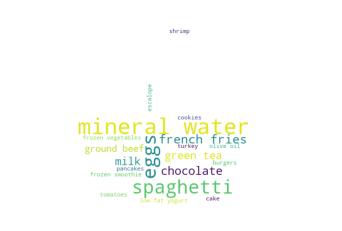

词频前 20 位商品为：
                 Sales  Counts
0       mineral water    1788
1                eggs    1348
2           spaghetti    1306
3        french fries    1282
4           chocolate    1230
5           green tea     991
6                milk     972
7         ground beef     737
8   frozen vegetables     715
9            pancakes     713
10            burgers     654
11               cake     608
12            cookies     603
13           escalope     595
14     low fat yogurt     574
15             shrimp     536
16           tomatoes     513
17          olive oil     494
18    frozen smoothie     475
19             turkey     469


In [2]:
#得到购物篮的词频
def get_counts(word):
    #替换空格
#   word = replace_(word)
    #转化为dataframe利于统计
    word = pd.DataFrame(word)
#   print(word)
    counts = pd.DataFrame(word.value_counts(), columns = ['count'])
    #重设index将商品名转化为一列数据
    counts2 = counts.reset_index()
    new_col = ['Sales', 'Counts']
    counts2.columns = new_col
    #将词频转化为字典格式
    dic = {}
    for i in range(counts2.shape[0]):
        dic[counts2.iloc[i, 0]] = counts2.iloc[i, 1]
    return dic, counts2    

#直接根据词频生成词云并显示Top位商品
def create_word_cloud(dic, top = 10):
    print('根据词频，开始生成词云!')
    #加载图片背景
    aimask=np.array(Image.open("购物篮.png"))
    wc = WordCloud(
        max_words = top,
        mask = aimask,
        background_color = "white",  # 背景颜色
        max_font_size = 100,  # 字体最大值
        min_font_size = 5, #字体最小值
        width = 2000,
        height = 1200,
        #collocations=False,  # 避免重复单词
        collocations = True, # 是否包括两个词的搭配
        relative_scaling = 0.5 ,# 词频和字体大小的关联性
    )
    wordcloud = wc.generate_from_frequencies(dic)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 
    print("词频前", top , "位商品为：\n", counts.head(top))

#得到词频字典dic及统计列表DataFrame
dic, counts = get_counts(word)
#生成词云并展示前Top位商品
create_word_cloud(dic, top = 20)